In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
market_df = pd.read_csv('supermarket_sales new.csv')

In [3]:
market_df.columns

Index(['Gender', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%'],
      dtype='object')

In [4]:
market_df.describe()

,Unit price,Quantity,Tax 5%
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392
std,26.494628,2.923431,100.551612
min,10.080000,1.000000,1.066000
25%,32.875000,3.000000,6.222500
50%,55.230000,5.000000,12.404000
75%,77.935000,8.000000,27.226250
max,99.960000,10.000000,985.000000


In [5]:
market_df.sample(5)

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
975,Male,577-34-7579,C,Naypyitaw,Member,Food and beverages,50.49,9,227.2050
86,Female,286-43-6208,C,Naypyitaw,Normal,Food and beverages,87.80,9,39.5100
37,Female,381-20-0914,A,Yangon,Member,Fashion accessories,20.01,9,9.1945
65,Female,802-70-5316,A,Yangon,Member,Sports and travel,92.13,6,27.6390
973,Male,503-21-4385,B,Mandalay,Member,Health and beauty,39.91,3,5.9865


In [6]:
market_df.isnull().sum()

Gender           0
Invoice ID       0
Branch           0
City             0
Customer type    0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
dtype: int64

In [7]:
market_df.nunique()

Gender              2
Invoice ID       1000
Branch              3
City                3
Customer type       2
Product line        6
Unit price        943
Quantity           10
Tax 5%            990
dtype: int64

In [8]:
market_df

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...,...
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920


# data wrangling

we can tell from the datafram that each branch corresponds to the city, hence we can drop either of the column


In [11]:
market_df = market_df.drop(columns=['Branch', 'Tax 5%'], axis=1)

In [12]:
market_df['Total'] = market_df['Unit price'] * market_df['Quantity']

In [13]:
market_df = market_df.drop(columns=['Unit price', 'Quantity'], axis=1)

In [14]:
market_df

,Gender,Invoice ID,City,Customer type,Product line,Total
0,Female,750-67-8428,Yangon,Member,Health and beauty,522.83
1,Female,226-31-3081,Naypyitaw,Normal,Electronic accessories,76.40
2,Female,355-53-5943,Yangon,Member,Electronic accessories,413.04
3,Female,315-22-5665,Naypyitaw,Normal,Home and lifestyle,735.60
4,Female,665-32-9167,Yangon,Member,Health and beauty,72.52
...,...,...,...,...,...,...
995,Male,745-74-0715,Yangon,Normal,Electronic accessories,116.06
996,Male,690-01-6631,Mandalay,Normal,Fashion accessories,174.90
997,Male,233-67-5758,Naypyitaw,Normal,Health and beauty,40.35
998,Male,727-02-1313,Yangon,Member,Food and beverages,31.84


In [15]:
market_df = market_df.drop(columns=['Invoice ID'], axis=1)

In [16]:
market_df

,Gender,City,Customer type,Product line,Total
0,Female,Yangon,Member,Health and beauty,522.83
1,Female,Naypyitaw,Normal,Electronic accessories,76.40
2,Female,Yangon,Member,Electronic accessories,413.04
3,Female,Naypyitaw,Normal,Home and lifestyle,735.60
4,Female,Yangon,Member,Health and beauty,72.52
...,...,...,...,...,...
995,Male,Yangon,Normal,Electronic accessories,116.06
996,Male,Mandalay,Normal,Fashion accessories,174.90
997,Male,Naypyitaw,Normal,Health and beauty,40.35
998,Male,Yangon,Member,Food and beverages,31.84


# using graphs to compare and find correlations

## correlation between total and other features


In [19]:
import seaborn as sns

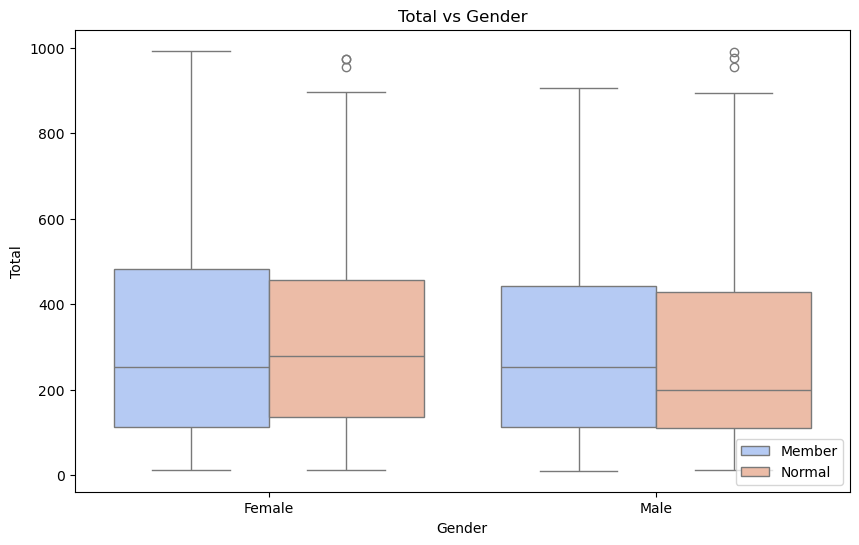

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=market_df, x='Gender', y='Total', hue='Customer type', palette='coolwarm')
plt.title('Total vs Gender')
plt.legend(loc='lower right')

Text(0, 0.5, 'Total')

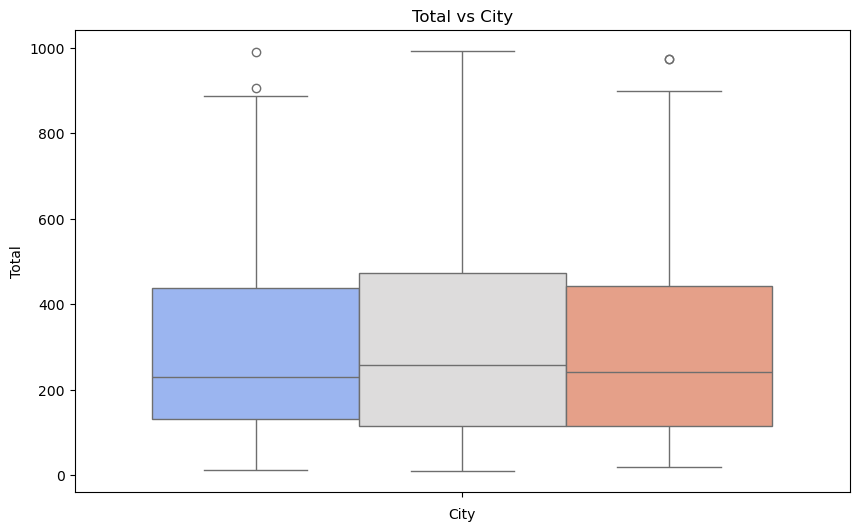

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=market_df, hue='City', y='Total', palette='coolwarm', legend=False)
plt.title('Total vs City')
plt.xlabel('City')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

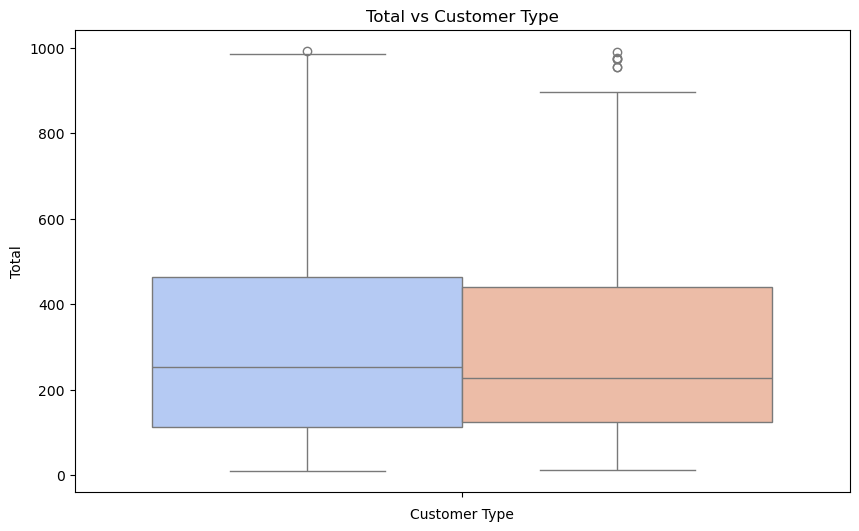

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=market_df, hue='Customer type', y='Total', palette='coolwarm', legend=False)
plt.title('Total vs Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Food and beverages'),
  Text(4, 0, 'Fashion accessories'),
  Text(5, 0, 'Sports and travel')])

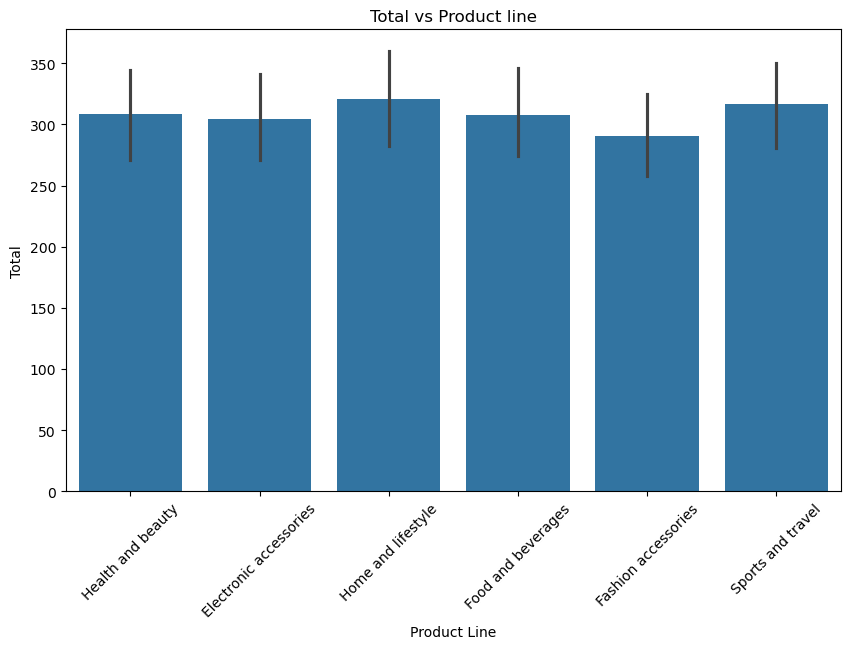

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=market_df, x = 'Product line', y='Total', estimator='mean')
plt.title('Total vs Product line')
plt.xlabel('Product Line')
plt.ylabel('Total')
plt.xticks(rotation=45)

Distribution of sales

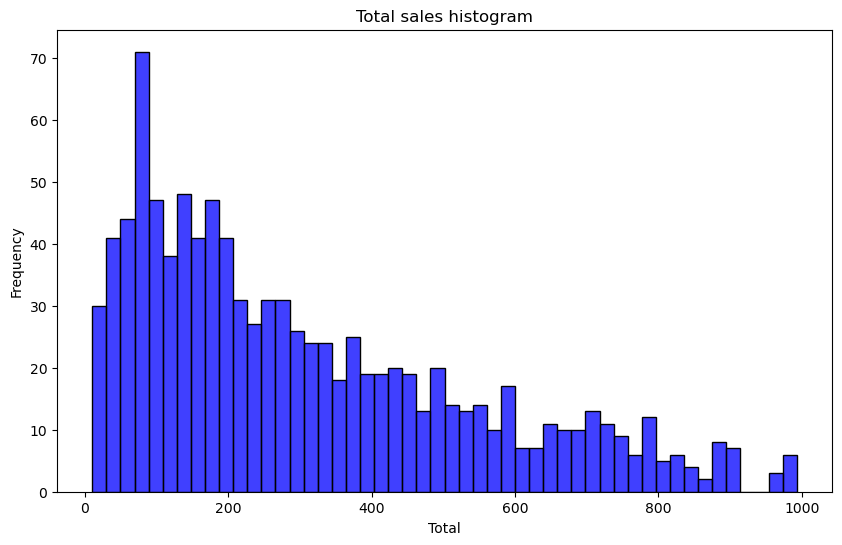

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=market_df, x='Total', bins=50, kde=False, color='blue')
plt.title('Total sales histogram')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()

## relationships between categorical features

Text(0.5, 1.0, 'Gender vs Customer Type')

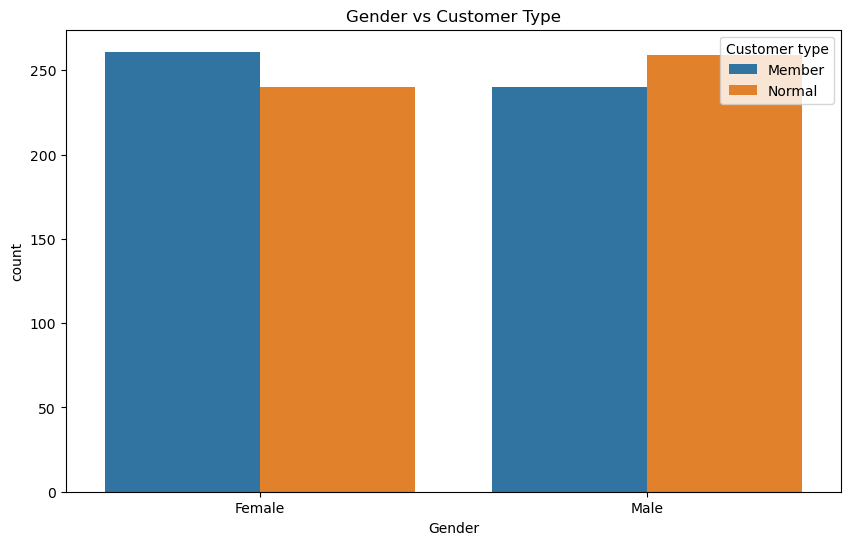

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=market_df, x = 'Gender', hue='Customer type')
plt.xlabel('Gender')
plt.title('Gender vs Customer Type')


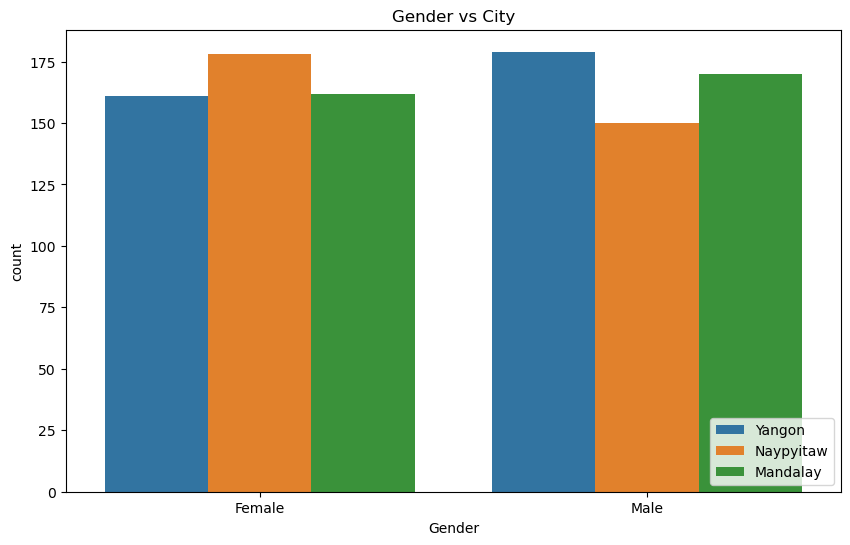

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=market_df, x='Gender', hue='City')
plt.title('Gender vs City')
plt.legend(loc='lower right')

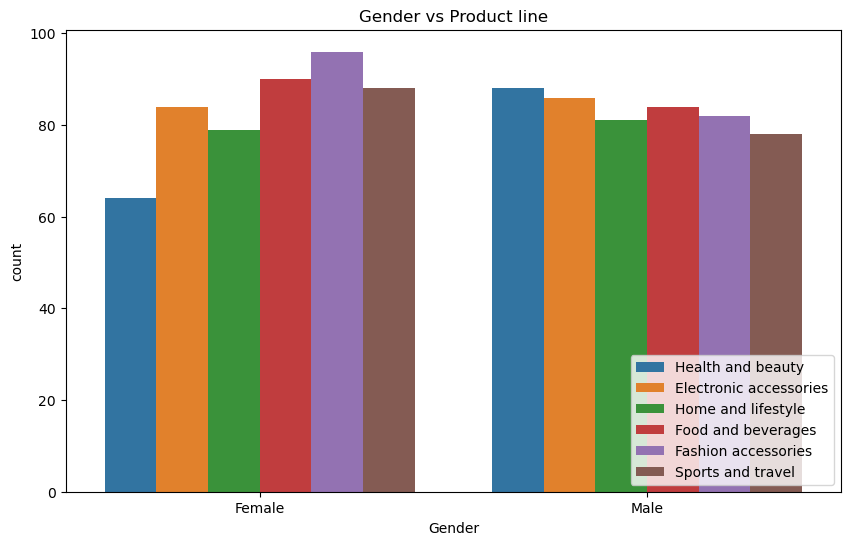

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=market_df, x='Gender', hue='Product line')
plt.title('Gender vs Product line')
plt.legend(loc='lower right')

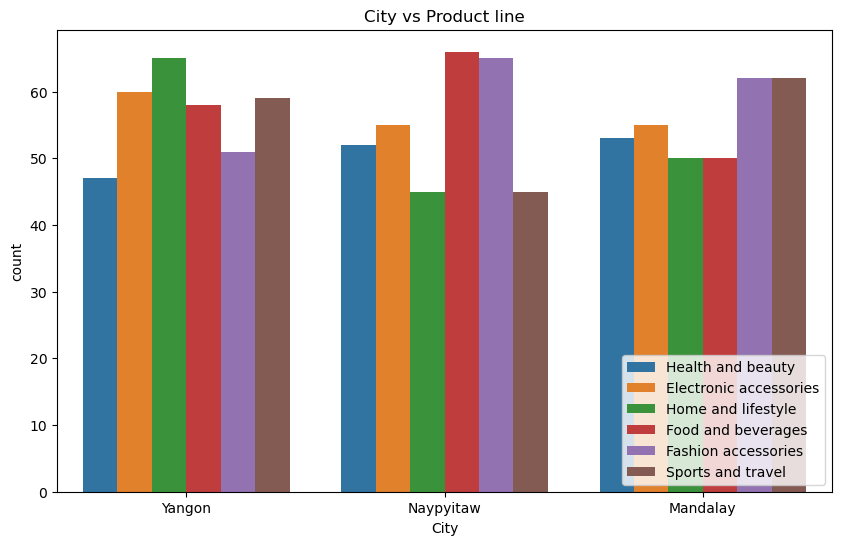

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=market_df, x='City', hue='Product line')
plt.title('City vs Product line')
plt.legend(loc='lower right')

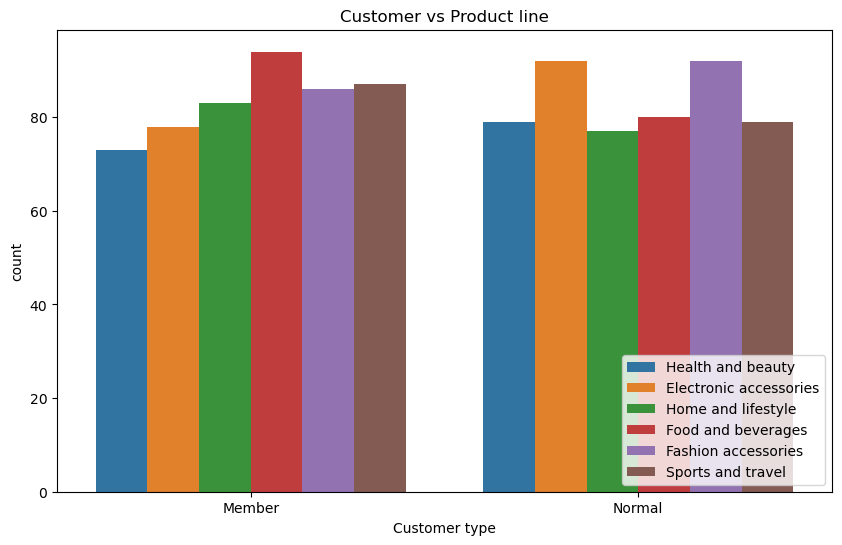

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=market_df, x='Customer type', hue='Product line')
plt.title('Customer vs Product line')
plt.legend(loc='lower right')

## Proportion by Categories

Text(0.5, 1.0, 'Gender Ratio')

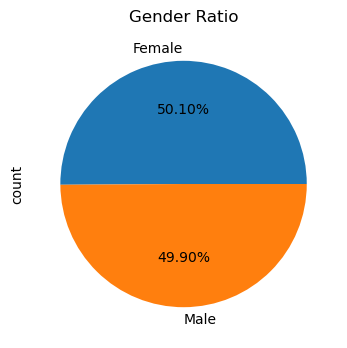

In [33]:
plt.figure(figsize = (4,4))
market_df['Gender'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Gender Ratio')

Text(0.5, 1.0, 'Customer in City Ratios')

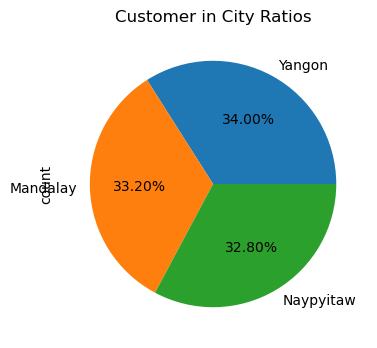

In [34]:
plt.figure(figsize = (4,4))
market_df['City'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Customer in City Ratios')

Text(0.5, 1.0, 'Customer type ratios')

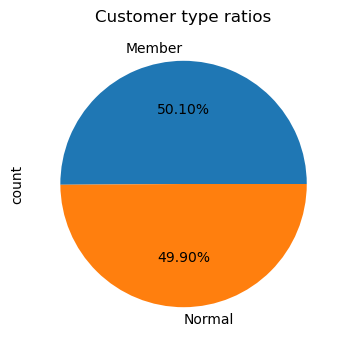

In [35]:
plt.figure(figsize = (4,4))
market_df['Customer type'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Customer type ratios')

Text(0.5, 1.0, 'Product line ratios')

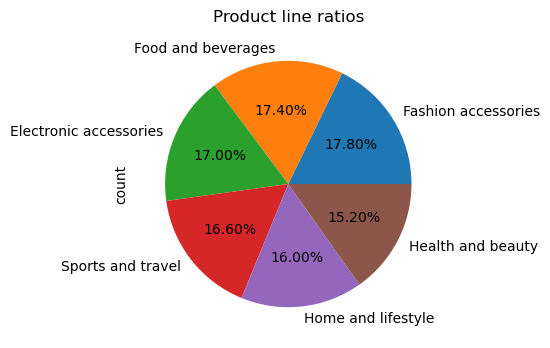

In [36]:
plt.figure(figsize = (4,4))
market_df['Product line'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Product line ratios')

# Machine learning

changing all string values in each rows into numerical form for machine learning algorithm processing

In [39]:
market_df

,Gender,City,Customer type,Product line,Total
0,Female,Yangon,Member,Health and beauty,522.83
1,Female,Naypyitaw,Normal,Electronic accessories,76.40
2,Female,Yangon,Member,Electronic accessories,413.04
3,Female,Naypyitaw,Normal,Home and lifestyle,735.60
4,Female,Yangon,Member,Health and beauty,72.52
...,...,...,...,...,...
995,Male,Yangon,Normal,Electronic accessories,116.06
996,Male,Mandalay,Normal,Fashion accessories,174.90
997,Male,Naypyitaw,Normal,Health and beauty,40.35
998,Male,Yangon,Member,Food and beverages,31.84


change all the columns that hold string values into numeric values to be used for machine learning algorithms using labelencoder

In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the columns
for column in ['Gender', 'City', 'Customer type', 'Product line']:
    market_df[column] = encoder.fit_transform(market_df[column])
    # Display the mapping for each column
    print(f"{column} Mapping:")
    print(dict(zip(encoder.classes_, range(len(encoder.classes_)))))
    print()


Gender Mapping:
{'Female': 0, 'Male': 1}

City Mapping:
{'Mandalay': 0, 'Naypyitaw': 1, 'Yangon': 2}

Customer type Mapping:
{'Member': 0, 'Normal': 1}

Product line Mapping:
{'Electronic accessories': 0, 'Fashion accessories': 1, 'Food and beverages': 2, 'Health and beauty': 3, 'Home and lifestyle': 4, 'Sports and travel': 5}



In [42]:
market_df

,Gender,City,Customer type,Product line,Total
0,0,2,0,3,522.83
1,0,1,1,0,76.40
2,0,2,0,0,413.04
3,0,1,1,4,735.60
4,0,2,0,3,72.52
...,...,...,...,...,...
995,1,2,1,0,116.06
996,1,0,1,1,174.90
997,1,1,1,3,40.35
998,1,2,0,2,31.84


### start modelling and comparing accuracy for different ml agorithms

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
X = market_df.drop('Total', axis=1)
y = market_df['Total']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
print("Mean of y_train:", X_train.mean())
print("Std of y_train:", X_train.std())

Mean of y_train: 2.997602166487923e-17
Std of y_train: 1.0


In [48]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

r2_score(y_test , y_pred)

-0.00437859035557886

In [50]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

r2_score(y_test, y_pred)

-0.09162651194539717

In [92]:
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)

r2_score(y_test, y_pred)

-0.021256132552572193